In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import dask.dataframe as dd

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_parquet('test.parquet')
df

,F_RunState,F_OperationTime,F_CuttingTime,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_ADC4,G_MV,G_MA,G_MActP,G_MRActP,G_MPF,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,,,,,,
2023-05-18 14:38:25,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:26,1,431109.0,170253.0,1858,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:27,1,431110.0,170254.0,1859,2133.0,7.0,680.0,40.0,32.599998,38.599998,1.0,0.56,216.910004,17.107,4.384,4.152,0.590,59.990002,41.0
2023-05-18 14:38:28,1,431112.0,170255.0,1901,2132.0,4.0,680.0,40.0,32.599998,38.599998,0.0,0.56,216.619995,17.635,4.552,4.180,0.595,59.990002,41.0
2023-05-18 14:38:29,1,431113.0,170256.0,1902,2133.0,7.0,680.0,40.0,32.500000,38.599998,0.0,0.56,216.919998,16.782,4.256,4.140,0.584,59.990002,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 20:23:20,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,221.179993,12.921,2.856,3.848,0.499,60.000000,45.0
2023-07-03 20:23:21,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.200001,41.500000,0.0,0.56,221.009995,12.897,2.840,3.840,0.498,60.000000,45.0
2023-07-03 20:23:22,3,943633.0,802713.0,2441,0.0,0.0,712.0,13.0,37.099998,41.400002,0.0,0.56,220.679993,12.899,2.844,3.824,0.499,60.000000,45.0


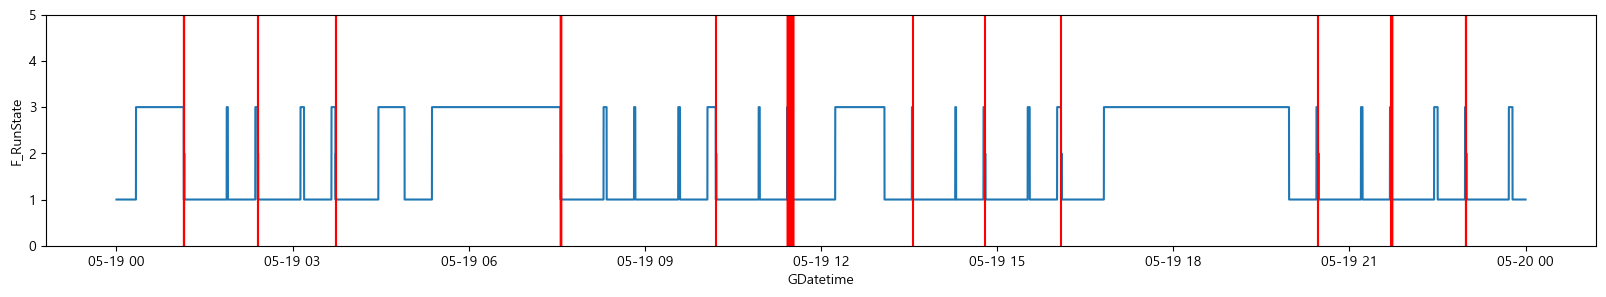

In [11]:
tmp = df.loc['2023-05-19']['F_RunState']
plt.figure(figsize=(20,3))
sns.lineplot(tmp)
for x_position in tmp[tmp == 2].index:
    plt.axvline(x=x_position, color='r')
plt.yticks(range(6))
plt.show()

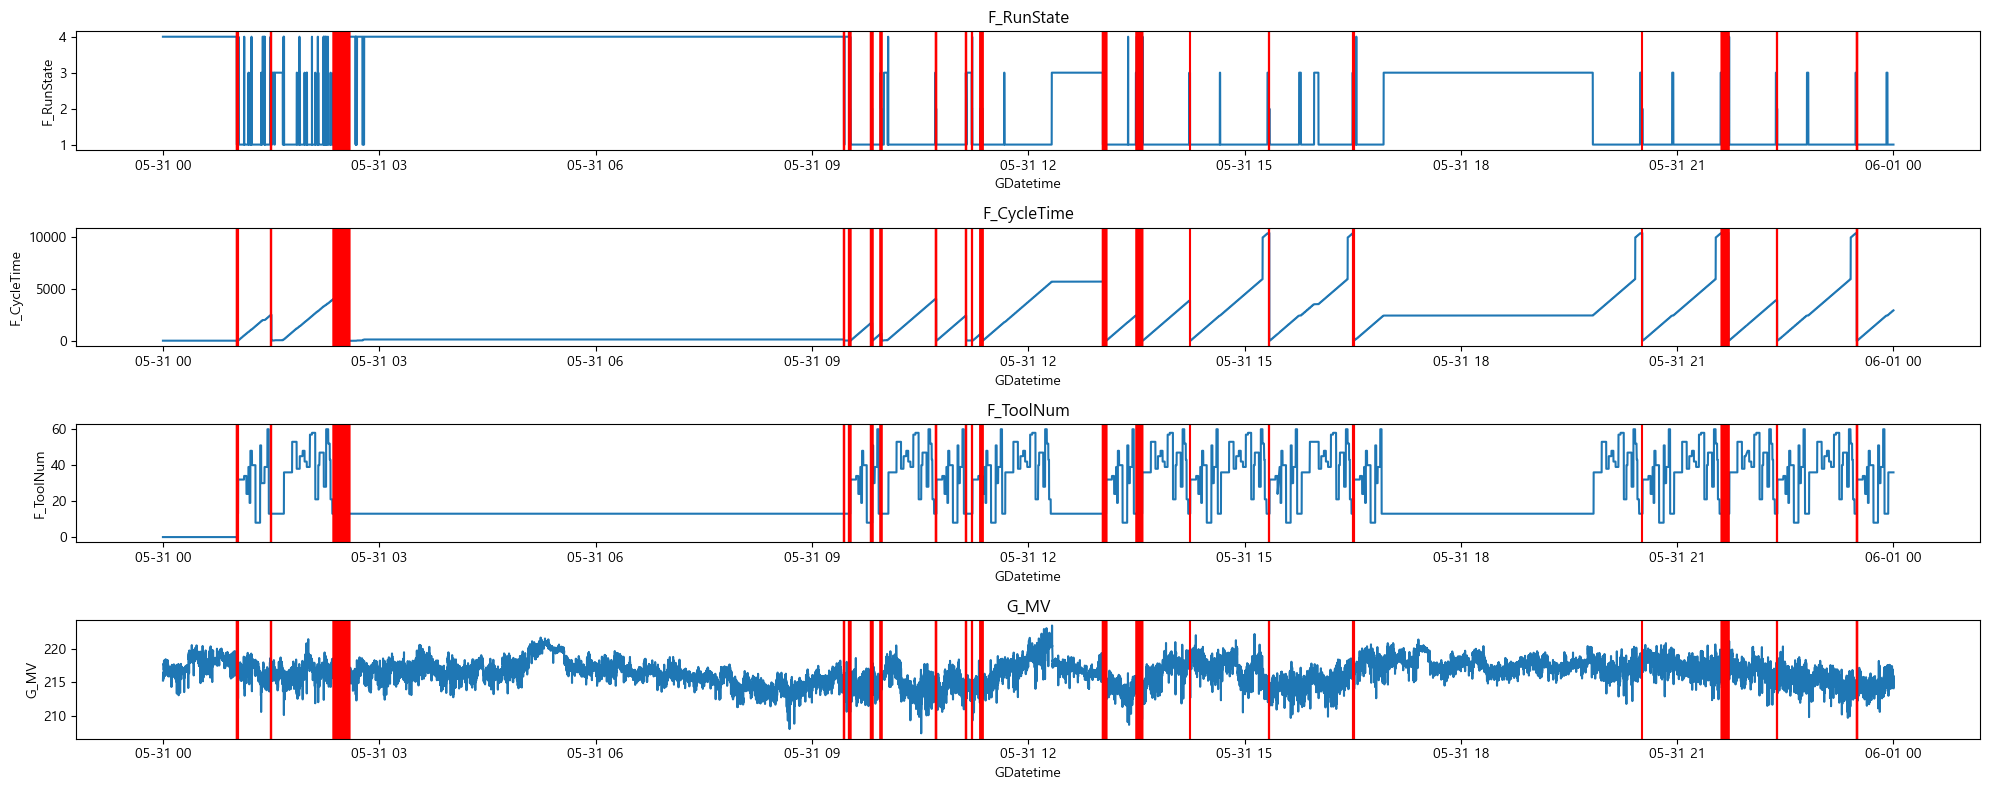

In [18]:
tmp = df.loc['2023-05-31'][['F_RunState', 'F_CycleTime', 'F_ToolNum', 'G_MV']]
plt.figure(figsize=(20, 8))
for i, column in enumerate(tmp.columns):
    plt.subplot(4, 1, i+1)
    sns.lineplot(tmp[column])
    for x_position in tmp[tmp['F_RunState'] == 2].index:
        plt.axvline(x=x_position, color='r')
    plt.title(column)
plt.tight_layout()
plt.show()